Perform Ridge regression with gradient decent and tune parameter without the help of libraries. Additionally, compare your results using SKLearn to validate your results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn import linear_model

In [2]:
credit = pd.read_csv('Credit_N400_p9.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331


In [3]:
# Changes categorical values to o or 1
credit['Gender']=credit['Gender'].astype('category')
credit['Student']=credit['Student'].astype('category')
credit['Married']=credit["Married"].astype("category")
cat_columns=credit.select_dtypes(['category']).columns
credit[cat_columns]=credit[cat_columns].apply(lambda x:x.cat.codes)

In [4]:
X=credit.drop(['Balance'],axis=1)
y=credit['Balance']

In [5]:
# creates a function to be recalled to standardize the data
def standardize(X):
  credit1=(X-X.mean())/X.std() # centralize and standardize the independent values
  return credit1
def centered_y(y):
  credit2=y-y.mean()# centralize the response values
  return credit2

In [6]:
# center and standardize the data
X=standardize(X) # assign the standardization to the independent values in the list
y=centered_y(y) # assign the centered function to the response values
#X.head()# print standardize data

In [7]:
def predict(x,beta):
  prediction=np.dot(x,beta)
  return prediction

def mse(y_true,y_pred):
  error=(np.sum((y_true-y_pred)**2))/len(y_true)
  return error

In [8]:
def cross_split(df,num):
       # Step 1 split the data 80/20
       validation = df[num*80:((num+1)*80)]
       train = pd.concat([df[:num*80],df[((num+1)*80):]])

       # Select training the data and drop Balance response variable     
       rX_train=train.drop(['Balance'],axis=1)
       ry_train=train['Balance']
       # Step 2 Centralize and standardize the data
       X_train_1 = standardize(rX_train)
       y_train_1 = centered_y(ry_train)
       # Select validation data and drop the response variable
       rX_val=validation.drop(['Balance'],axis=1)
       ry_val=validation['Balance']
        # centralize and standardize the data
       X_val_1 = standardize(rX_val)
       y_val_1 = centered_y(ry_val)

       return X_train_1,y_train_1,X_val_1,y_val_1



In [9]:
def r_gradient(X,y,alpha,lamb,beta):

  lambbeta=np.dot(lamb,beta)# matrix multiplication for lambda and beta

  xst=np.transpose(X) # transpose the X values

  xsbeta=np.dot(X,beta) # matrix multiplication for X and beta

  prediction=np.subtract(y,xsbeta) # subtract xbeta  from y

  prediction2=np.dot(xst,prediction) # combines and multiply previous defined variables
  
  beta2=np.dot(2*alpha,(np.subtract(lambbeta,prediction2)))
  beta =np.subtract(beta,beta2)# total combination of the parameter vector
  return beta # return the beta values from the parameter function

In [73]:
lambdas=[10**-4,10**-1,10**0,10**1,10**2,10**3,10**4] # seven preditermined values of lambda (global)
beta_list=[] # empty list for beta values
# calculate the gradient decent function to find the beta values for the given lambdas
for lamb in lambdas:
  beta=np.random.uniform(-1,1,X.shape[1])# initialize beta with random number from -1 to 1
  for i in range(1000): # perform 1000 iterations
    beta_hat=r_gradient(X,y,10**-5,lamb,beta) # apply the function gradient
    beta=beta_hat # save the beta values
  beta_list.append(beta)# create a list of the beta values
  betalist=pd.DataFrame(beta_list)# convert to a data frame
betalist # print  the beta list

,0,1,2,3,4,5,6,7,8
0,-227.307932,288.746216,284.759185,22.096822,-16.893616,-2.006439,3.670441,125.316772,-5.495521
1,-227.170750,288.739910,284.605675,22.098053,-16.892580,-2.004551,3.666338,125.283411,-5.495204
2,-225.200654,288.273505,282.970908,22.158331,-16.971332,-1.982149,3.605632,124.960072,-5.505371
3,-206.582841,277.511896,273.739858,22.427398,-17.673310,-1.739453,3.035434,121.788045,-5.629990
4,-91.243494,209.829387,208.370976,22.613598,-19.596980,-0.405939,-0.332277,97.597861,-5.818259
5,22.974251,84.063238,84.202757,10.261706,-5.683981,-0.100476,-1.993705,33.983938,-1.956860
6,7.300327,14.426757,14.459044,1.499893,-0.127477,-0.114057,-0.363408,4.568672,-0.133970


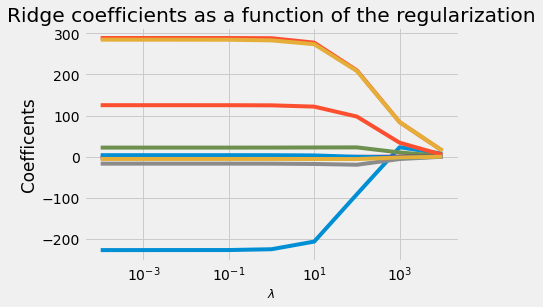

In [75]:
# plot results for beta values
#betas=pd.DataFrame(beta_list)
#betas.index=lambdas
#pd.DataFrame(betas,columns=X.columns[0:-1])

with plt.style.context('fivethirtyeight'):
  plt.plot(lambdas,beta_list)
  plt.xscale("log")
  plt.title('Ridge coefficients as a function of the regularization')
  plt.xlabel(r'$\lambda$',fontsize=12)
  plt.ylabel('Coefficents')
  plt.show()

In [12]:
df=credit.sample(frac=1).reset_index(drop=True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,28.575,2959,231,2,60,11,0,0,0,0
1,83.948,7100,503,2,44,18,1,0,0,806
2,180.379,9310,665,3,67,8,0,1,1,1050
3,55.882,4897,357,2,68,16,1,0,1,331
4,18.145,3461,279,3,56,15,1,0,1,255


In [54]:
error_list=[]

# step 3 apply gradient decent to training values

for i in range(5): # Use the cross split to extract the 5 folds
   X_train,y_train,X_val,y_val=cross_split(df,i)
   print(len(X_train))
   
   for lamb in lambdas:
       beta=np.random.uniform(-1,1,X_train.shape[1]) # initialize beta values from -1 to 1
       
 # loop to go over the seven lambdas 
       for k in range(1000): # apply gradient to training data
          betahat=r_gradient(X_train,y_train,10**-5,lamb,beta)
          beta=betahat
        
# step 4 apply MSE      
# apply MSE to the validation data and create a list       
# MSE formula 
       prediction=predict(X_val,beta)
       errors=mse(y_val,prediction) 
       error_list.append(errors)
   print("Loop Complete")
       
       #print(error_list)
       

320
Loop Complete
320
Loop Complete
320
Loop Complete
320
Loop Complete
320
Loop Complete


In [55]:
def error_avg(ls:list) ->list:
    errors = []
    for i in range(7):
        er = sum(ls[i::7])/5 # select every 7 value in the list
        errors.append(er)
    return errors

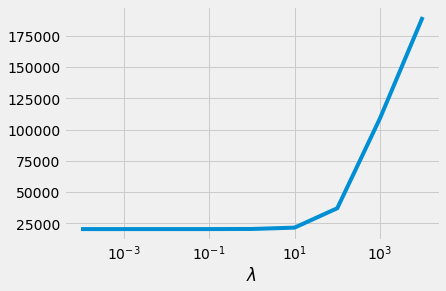

In [56]:
# plot the values for  the MSE
error_mean = error_avg(error_list)
with plt.style.context('fivethirtyeight'):
  plt.plot(lambdas,error_mean)
  plt.xscale('log')
  plt.title('Ridge coefficients as a function of the regularization')
  plt.xlabel('$\lambda$')
  plt.show()

In [57]:
beta_list=[]

# Run Model using the best parameters
beta=np.random.uniform(-1,1,X.shape[1])
for i in range(1000):
    beta_hat=r_gradient(X,y,10**-5,10**-4,beta)
    beta=beta_hat
beta_list.append(beta_hat)
pd.DataFrame(beta_list)


,0,1,2,3,4,5,6,7,8
0,-227.481559,289.075726,284.585796,22.0952,-16.872938,-2.010343,3.676164,125.324877,-5.490572


Calculate Ridge regression with gradient using SKlearn

In [39]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size=.20,random_state=22)
print(len(X_train_2),len(X_test_2))

320 80


In [60]:
n_alphas = 7
lambdas_2 = np.logspace(-4, 2, n_alphas)
# Find lambda that minimize the error
err = []
coefs = []
for a in lambdas_2:
       ridge = SGDRegressor(penalty = 'l2',alpha=a,eta0=0.0001,learning_rate='constant') # alpha refers to lambda in SKlearn
       ridge.fit(X_train_2, y_train_2.ravel())
       coefs.append(ridge.coef_)
       pred=ridge.predict(X_test_2)
       error=mse(y_test_2,pred) 
       print(round(error,2))
       err.append(error)



9278.53
9304.99
9830.35
17844.61
71859.05
176445.28
226106.85


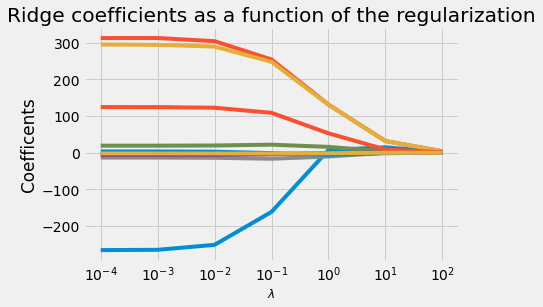

In [65]:
with plt.style.context('fivethirtyeight'):
  plt.plot(lambdas_2,coefs)
  plt.xscale("log")
  plt.title('Ridge coefficients as a function of the regularization')
  plt.xlabel(r'$\lambda$',fontsize=12)
  plt.ylabel('Coefficents')
  plt.show()

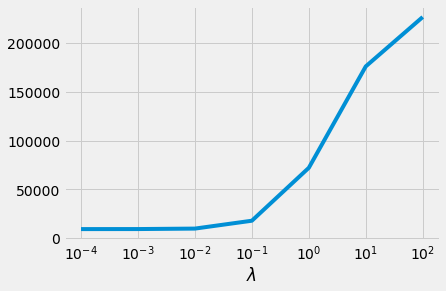

In [47]:
with plt.style.context('fivethirtyeight'):
  plt.plot(lambdas_2,err)
  plt.xscale('log')
  plt.xlabel('$\lambda$')
  plt.show()

In [59]:
# run ridge regression with the selected tune parameters
ridge_2 = SGDRegressor(penalty = 'l2',alpha=.0001,eta0=0.0001,learning_rate='constant') # alpha refers to lambda in SKlearn
ridge_2.fit(X_train_2, y_train_2.ravel())
pred=ridge_2.predict(X_test_2)
error=mse(y_test_2,pred) 
print("The error is:",round(error,2))
print((pd.DataFrame(ridge_2.coef_)).T)
       

The error is: 9279.73
            0           1           2          3          4         5  \
0 -266.322362  313.099253  295.537334  19.064443 -13.519487 -5.041578   

          6           7         8  
0  3.214022  124.558142 -2.409253  
